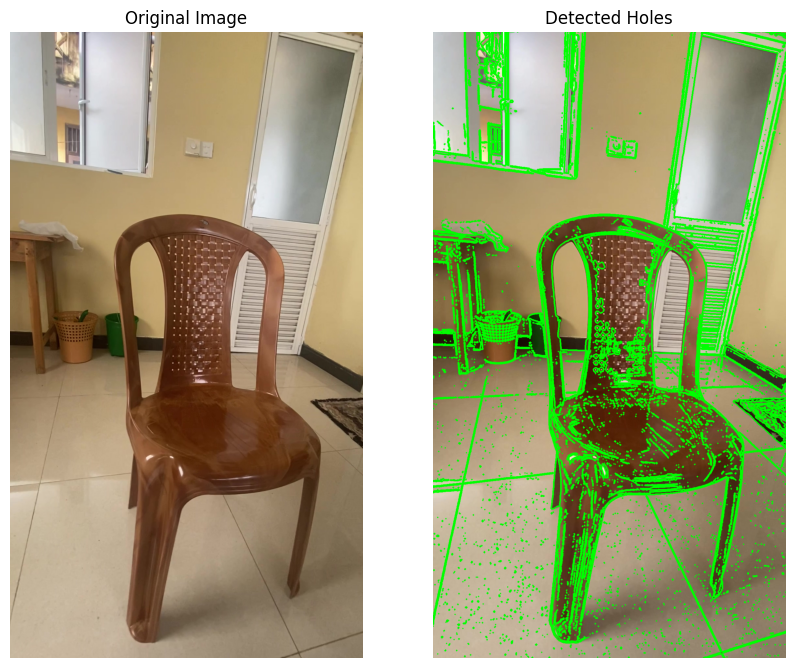

In [4]:
# Threasholding

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def get_holes(img):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_blur = cv.GaussianBlur(img_gray, (5, 5), 0)
    binary_img = cv.adaptiveThreshold(img_blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv.THRESH_BINARY_INV, 11, 2)
    kernel = np.ones((3, 3), np.uint8)
    morph_img = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, kernel)     # Optional
    contours, _ = cv.findContours(morph_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(img, contours, -1, (0, 255, 0), 3)  # Drawing contours (remove this after debugging)

    for cnt in contours:
        area = cv.contourArea(cnt)
        perimeter = cv.arcLength(cnt, True)
        
        x, y, w, h = cv.boundingRect(cnt)
        aspect_ratio = float(w) / h
        
        # Classify based on shape
        if perimeter > 0:
            circularity = 4 * np.pi * (area / (perimeter ** 2))
            if circularity > 0.7:
                cv.drawContours(img, [cnt], -1, (0, 255, 0), 3)  # Green for circular holes
        elif aspect_ratio > 1.5:  # Elongated or irregular
            cv.drawContours(img, [cnt], -1, (255, 0, 0), 3)  # Blue for elongated holes

    return img

# Read the image
img = cv.imread("/home/lathika/Workspace/Data_Sets/My_Data_sets/Chair/input/0034.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Process the image to detect holes
out_img = get_holes(img)

out_img_rgb = cv.cvtColor(out_img, cv.COLOR_BGR2RGB)


# Display 
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(out_img_rgb)
plt.title('Detected Holes')
plt.axis('off')

plt.show()


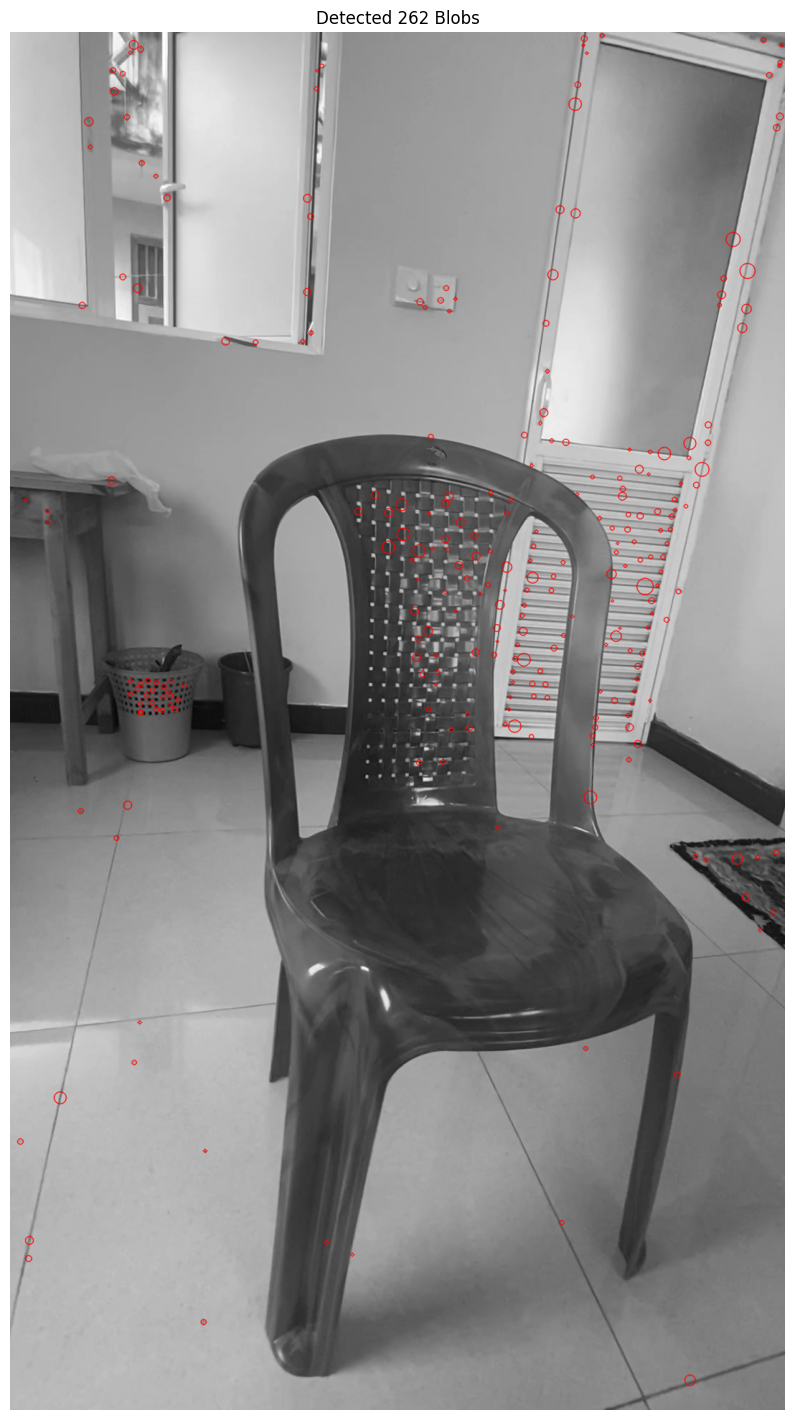

In [10]:
# heuristic-based blob detecion

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blobs(image, min_size, max_size):
    # Set up the SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Filter by area (blob size)
    params.filterByArea = True
    params.minArea = min_size  # Min size of blob (in pixels)
    params.maxArea = max_size  # Max size of blob (in pixels)

    # Other optional filters
    params.filterByCircularity = False  # Disable circularity filtering
    params.filterByConvexity = False     # Disable convexity filtering
    params.filterByInertia = False       # Disable inertia filtering

    # Create a blob detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs
    keypoints = detector.detect(image)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the blob size
    blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), 
                                   cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return blob_image, keypoints

# Read the image
img = cv2.imread("/home/lathika/Workspace/Data_Sets/My_Data_sets/Chair/input/0034.jpg", cv2.IMREAD_GRAYSCALE)

# Define blob size range (min and max area in pixels)
min_blob_size = 10  # Change based on your needs
max_blob_size = 100  # Change based on your needs

# Detect blobs
blob_image, keypoints = detect_blobs(img, min_blob_size, max_blob_size)

# Convert to RGB for displaying with matplotlib (optional for visualization)
blob_image_rgb = cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB)

# Display the image with blobs detected
plt.figure(figsize=(10, 20))
plt.imshow(blob_image_rgb)
plt.title(f'Detected {len(keypoints)} Blobs')
plt.axis('off')
plt.show()


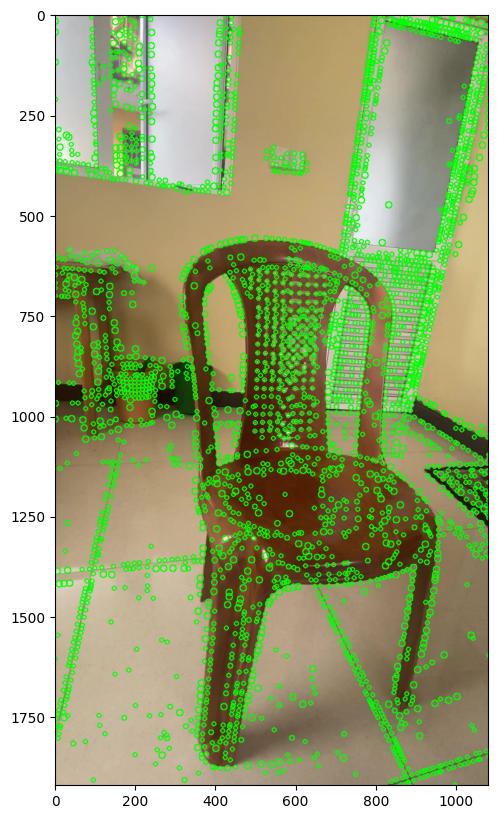

Blob 1: Centroid = (580.00, 1041.00), Radius = 5.00
Blob 2: Centroid = (494.00, 1304.00), Radius = 5.00
Blob 3: Centroid = (523.00, 1348.00), Radius = 8.00
Blob 4: Centroid = (589.00, 1073.00), Radius = 7.25
Blob 5: Centroid = (424.00, 1305.00), Radius = 8.00
Blob 6: Centroid = (566.00, 1020.00), Radius = 5.00
Blob 7: Centroid = (580.00, 998.00), Radius = 5.00
Blob 8: Centroid = (568.00, 977.00), Radius = 5.00
Blob 9: Centroid = (216.00, 0.00), Radius = 6.50
Blob 10: Centroid = (593.00, 856.00), Radius = 5.75
Blob 11: Centroid = (506.00, 729.00), Radius = 5.00
Blob 12: Centroid = (438.00, 19.00), Radius = 5.00
Blob 13: Centroid = (620.00, 878.00), Radius = 5.00
Blob 14: Centroid = (486.00, 680.00), Radius = 5.00
Blob 15: Centroid = (587.00, 876.00), Radius = 5.00
Blob 16: Centroid = (562.00, 846.00), Radius = 5.00
Blob 17: Centroid = (486.00, 657.00), Radius = 5.00
Blob 18: Centroid = (505.00, 774.00), Radius = 5.00
Blob 19: Centroid = (523.00, 843.00), Radius = 5.00
Blob 20: Centroid 

In [3]:
# Laplacian of Gaussian method

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log

def detect_blobs_log(image, min_blob_size, max_blob_size, num_intervals):
    """
    Detects blobs in an image using Laplacian of Gaussian (LoG).

    Parameters:
        image (ndarray): Input image read using OpenCV (BGR format).
        min_blob_size (float): Minimum size (in pixels) of blobs to detect.
        max_blob_size (float): Maximum size (in pixels) of blobs to detect.
        num_intervals (int): Number of intervals to divide the blob size range.

    Returns:
        blobs (ndarray): Array of detected blobs, with each blob represented as [y, x, r].
                         (y, x) are the centroid coordinates, and r is the radius.
        output_image (ndarray): Image with detected blobs drawn.
    """
    # Convert image to grayscale if it is not already
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    
    # Detect blobs using the Laplacian of Gaussian (LoG) method
    # skimage.feature.blob_log automatically computes the Laplacian of Gaussians
    # The function will return the coordinates and radii of the blobs detected
    blobs = blob_log(gray_image, 
                     min_sigma=min_blob_size / np.sqrt(2), 
                     max_sigma=max_blob_size / np.sqrt(2), 
                     num_sigma=num_intervals, 
                     threshold=0.01)
    
    # Compute radii in the 3rd column as sigma * sqrt(2)
    blobs[:, 2] = blobs[:, 2] * np.sqrt(2)
    
    # Draw blobs on the image for output
    output_image = image.copy()
    for blob in blobs:
        y, x, r = blob
        cv2.circle(output_image, (int(x), int(y)), int(r), (0, 255, 0), 2)

    return blobs, output_image

# Example of how to use the function
# Load image using OpenCV
image_path = "/home/lathika/Workspace/Data_Sets/My_Data_sets/Chair/input/0034.jpg"
image = cv2.imread(image_path)

# Define blob detection parameters
min_blob_size = 5  # Minimum blob size (in pixels)
max_blob_size = 8  # Maximum blob size (in pixels)
num_intervals = 5  # Number of intervals to divide the size range

# Detect blobs and plot results
blobs, output_image = detect_blobs_log(image, min_blob_size, max_blob_size, num_intervals)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

# Output the blobs details: centroid (x, y) and radius
for i, blob in enumerate(blobs):
    print(f"Blob {i+1}: Centroid = ({blob[1]:.2f}, {blob[0]:.2f}), Radius = {blob[2]:.2f}")



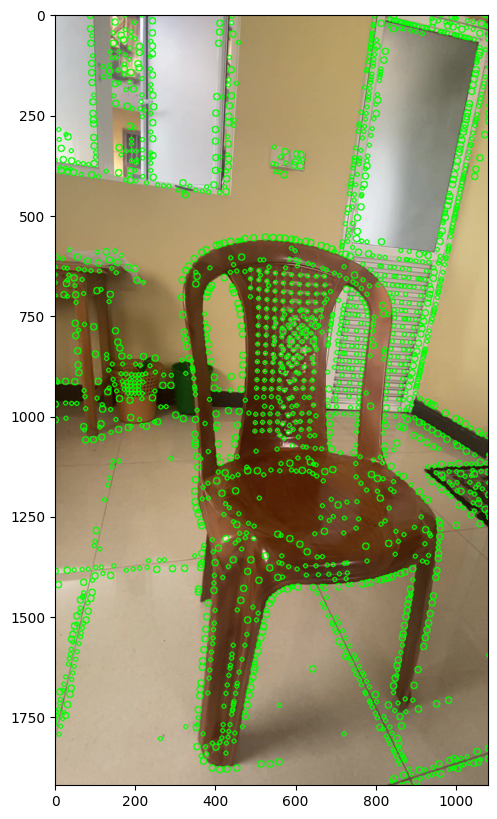

<class 'numpy.ndarray'>
[1040.  580.    5.]


In [2]:
# Difference of Gaussian method

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog

def detect_blobs_dog(image, min_blob_size, max_blob_size, num_intervals):
    """
    Detects blobs in an image using Difference of Gaussian (DoG).

    Parameters:
        image (ndarray): Input image read using OpenCV (BGR format).
        min_blob_size (float): Minimum size (in pixels) of blobs to detect.
        max_blob_size (float): Maximum size (in pixels) of blobs to detect.
        num_intervals (int): Number of intervals to divide the blob size range.

    Returns:
        blobs (ndarray): Array of detected blobs, with each blob represented as [y, x, r].
                         (y, x) are the centroid coordinates, and r is the radius.
        output_image (ndarray): Image with detected blobs drawn.
    """
    # Convert image to grayscale if it is not already
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    
    # Detect blobs using the Difference of Gaussian (DoG) method
    blobs = blob_dog(gray_image, 
                     min_sigma=min_blob_size / np.sqrt(2), 
                     max_sigma=max_blob_size / np.sqrt(2), 
                     sigma_ratio=1.6, 
                     threshold=0.01)
    
    # Compute radii in the 3rd column as sigma * sqrt(2)
    blobs[:, 2] = blobs[:, 2] * np.sqrt(2)
    
    # Draw blobs on the image for output
    output_image = image.copy()
    for blob in blobs:
        y, x, r = blob
        cv2.circle(output_image, (int(x), int(y)), int(r), (0, 255, 0), 2)

    return blobs, output_image

# Example of how to use the function
# Load image using OpenCV
image_path = "/home/lathika/Workspace/Data_Sets/My_Data_sets/Chair/input/0034.jpg"
image = cv2.imread(image_path)

# Define blob detection parameters
min_blob_size = 5  # Minimum blob size (in pixels)
max_blob_size = 8  # Maximum blob size (in pixels)
num_intervals = 5  # Number of intervals to divide the size range

# Detect blobs and plot results
blobs, output_image = detect_blobs_dog(image, min_blob_size, max_blob_size, num_intervals)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

# Output the blobs details: centroid (x, y) and radius
for i, blob in enumerate(blobs):
    
    if i==1:
        print(type(blob))
        print(blob)
    #print(f"Blob {i+1}: Centroid = ({blob[1]:.2f}, {blob[0]:.2f}), Radius = {blob[2]:.2f}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

def gaussian_blur_2d(input_tensor, sigma):
    """
    Applies Gaussian blur to a tensor using a manually created Gaussian kernel.
    
    Parameters:
        input_tensor (torch.Tensor): The input tensor to blur (shape [1, 1, H, W]).
        sigma (float): The standard deviation for Gaussian kernel.
    
    Returns:
        blurred_tensor (torch.Tensor): Blurred tensor.
    """
    # Define kernel size; typically 6*sigma (rounded to the nearest odd integer) is used
    kernel_size = int(2 * round(3 * sigma) + 1)
    x = torch.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    x = x.repeat(kernel_size, 1).unsqueeze(0).unsqueeze(0).cuda()
    
    # Compute Gaussian kernel
    kernel = torch.exp(-(x**2 + x.permute(0, 1, 3, 2)**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    
    # Apply Gaussian kernel to the image using convolution
    blurred_tensor = F.conv2d(input_tensor, kernel, padding=kernel_size // 2)
    return blurred_tensor

def detect_blobs_dog_pytorch(image, min_blob_size, max_blob_size, num_intervals, threshold=0.01):
    """
    Detects blobs in an image using Difference of Gaussian (DoG) with PyTorch for GPU compatibility.

    Parameters:
        image (ndarray): Input image read using OpenCV (BGR format).
        min_blob_size (float): Minimum size (in pixels) of blobs to detect.
        max_blob_size (float): Maximum size (in pixels) of blobs to detect.
        num_intervals (int): Number of intervals to divide the blob size range.
        threshold (float): Threshold for detecting blobs based on intensity.

    Returns:
        blobs (list of tuples): List of detected blobs, each represented as (y, x, r).
                                (y, x) are the centroid coordinates, and r is the radius.
        output_image (ndarray): Image with detected blobs drawn.
    """
    # Convert image to grayscale if needed
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    
    # Convert the grayscale image to a PyTorch tensor and move it to GPU
    gray_tensor = torch.tensor(gray_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).cuda() / 255.0

    # Create scales for Gaussian blurring based on min and max blob sizes
    sigma_values = np.linspace(min_blob_size, max_blob_size, num_intervals)

    # Storage for detected blobs
    blobs = []

    for sigma in sigma_values:
        # Apply Gaussian blur with different sigmas
        blurred1 = gaussian_blur_2d(gray_tensor, sigma * 1.6)
        blurred2 = gaussian_blur_2d(gray_tensor, sigma)
        
        # Compute the Difference of Gaussian
        dog = (blurred1 - blurred2).abs()
        
        # Detect blobs by applying a threshold
        mask = dog > threshold
        coords = mask.nonzero(as_tuple=False).cpu().numpy()[:, 2:]  # x, y positions

        # Append detected blobs with the radius estimated by sigma
        for coord in coords:
            blobs.append((coord[1], coord[0], sigma * np.sqrt(2)))  # y, x, r

    # Draw detected blobs on the output image
    output_image = image.copy()
    for blob in blobs:
        y, x, r = blob
        cv2.circle(output_image, (int(x), int(y)), int(r), (0, 255, 0), 2)

    return blobs, output_image

# Example of how to use the function
# Load image using OpenCV
image_path = "/home/lathika/Workspace/Data_Sets/My_Data_sets/Chair/input/0034.jpg"
image = cv2.imread(image_path)

# Define blob detection parameters
min_blob_size = 5  # Minimum blob size (in pixels)
max_blob_size = 8  # Maximum blob size (in pixels)
num_intervals = 5  # Number of intervals to divide the size range

# Detect blobs and plot results
blobs, output_image = detect_blobs_dog_pytorch(image, min_blob_size, max_blob_size, num_intervals)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

# Output the blobs details: centroid (x, y) and radius
for i, blob in enumerate(blobs):
    print(f"Blob {i+1}: Centroid = ({blob[1]:.2f}, {blob[0]:.2f}), Radius = {blob[2]:.2f}")

